#Word2Vec:
uses a neural network model to learn word associations from a large corpus of text

Embedding:

word --> vector --> n dimension array

Ref: https://en.wikipedia.org/wiki/Word2vec

WV positioned in the vector space such that words that share common contexts in the corpus are located close to one another in the space

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [ ]:
import gensim.downloader as api
word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
type(word2vec_model)

gensim.models.keyedvectors.Word2VecKeyedVectors

In [ ]:
def getvector(word):
  try:
    return word2vec_model[word]
  except KeyError:
    return "NOT FOUND IN VOCABLORY"

In [ ]:
getvector("python")


array([ 0.27734375,  0.12402344, -0.40820312,  0.15722656, -0.19726562,
       -0.11767578,  0.06640625,  0.08300781, -0.29492188,  0.28710938,
       -0.04638672, -0.54296875, -0.08056641, -0.09619141, -0.23535156,
       -0.29101562,  0.16699219,  0.07910156, -0.26171875, -0.0324707 ,
       -0.08691406, -0.21289062,  0.19335938,  0.3046875 ,  0.04785156,
       -0.03295898, -0.38867188,  0.24609375,  0.578125  , -0.3125    ,
       -0.04052734,  0.3359375 , -0.02539062, -0.1640625 , -0.09130859,
        0.125     , -0.06787109,  0.23046875, -0.00921631,  0.37890625,
       -0.04296875, -0.02661133,  0.09130859,  0.33007812, -0.02758789,
       -0.25195312,  0.14550781,  0.06445312,  0.13867188, -0.07128906,
        0.04052734,  0.00531006,  0.5625    , -0.27929688,  0.2421875 ,
       -0.19628906,  0.3203125 , -0.1640625 ,  0.25976562,  0.13476562,
        0.25976562, -0.06445312, -0.09619141, -0.06640625, -0.265625  ,
        0.04516602, -0.06689453, -0.25195312, -0.18164062, -0.02

In [ ]:
getvector("abcd")

'NOT FOUND IN VOCABLORY'

word --> vector --> n dimension array

**SIMILARITY**: cosine of angle beetween vectors

![img](https://trello-attachments.s3.amazonaws.com/5f81c78bb4c7951c3be5060c/5fb1d3656e20326524242704/92473dcdc68f5856576497930e0896b5/wordvect.PNG)


In [ ]:
word2vec_model.most_similar("HTML")

[('XHTML', 0.6955783367156982),
 ('XHTML_CSS', 0.6913371682167053),
 ('HTML_XML', 0.6611957550048828),
 ('Javascript', 0.6592451930046082),
 ('XML', 0.6575669050216675),
 ('HTML_CSS', 0.6540465354919434),
 ('HTML_JavaScript', 0.6484460830688477),
 ('Cascading_Style_Sheets', 0.648266077041626),
 ('ActionScript', 0.6438319683074951),
 ('XAML', 0.6403220891952515)]

#Special in WordVec

queen - girl + boy = king

![img](https://trello-attachments.s3.amazonaws.com/5f81c78bb4c7951c3be5060c/5fb1d3656e20326524242704/ce1a77ccef088c24e510214f90402a9c/kingex.PNG)

In [ ]:
word2vec_model.most_similar(positive=['boy', 'queen'], negative=['girl'], topn=1)

[('king', 0.7298422455787659)]

#Visualizing WordVect in 2D

Ref: https://www.kaggle.com/jeffd23/visualizing-word-vectors-with-t-sne

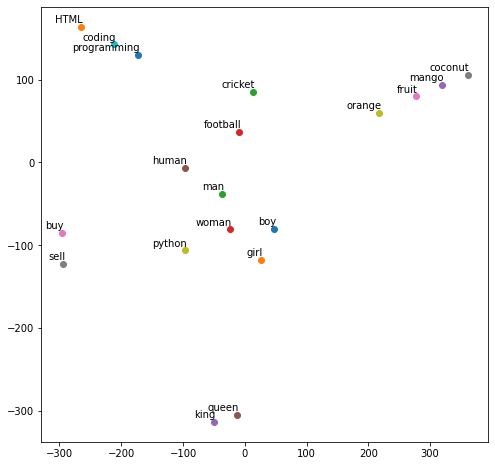

In [ ]:
vocab = ["boy", "girl", "man", "woman", "king", "queen", "buy","sell", "python", "coding", "programming","HTML", "cricket","football", "mango", "human", "fruit", "coconut", "orange"]

def tsne_plot(model):
    labels = []
    wordvecs = []

    for word in vocab:
        wordvecs.append(model[word])
        labels.append(word)

    tsne_model = TSNE(perplexity=3, n_components=2, init='pca', random_state=42)
    coordinates = tsne_model.fit_transform(wordvecs)

    x = []
    y = []
    for value in coordinates:
        x.append(value[0])
        y.append(value[1])

    plt.figure(figsize=(8,8))
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(2, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

tsne_plot(word2vec_model)

#Custom Word2Vec



In [ ]:
import gensim
import os

coding_lines = [
                "Python programming language".lower().split(),
                "Python’s elegant syntax and dynamic typing, together with its interpreted nature, make it an ideal language for scripting and rapid application development in many areas on most platforms".lower().split(),
                "Computer programming is the process of designing and building an executable computer program to accomplish a specific computing result or to perform a specific task".lower().split(),
                "Machine translation is the task of translating text from one language to another.".lower().split(),
                "The Python interpreter is easily extended with new functions and data types implemented in C or C++".lower().split(),
                "coding in python makes life easy".lower().split(),
                "django web framework is best for python coding ".lower().split(),
                "python django both go by hand by hand".lower().split()
]


mytechmodel = gensim.models.Word2Vec(sentences=coding_lines, size=5, window=3, workers=4, min_count=1, sg=1) #sg= 1:skip-gram 0:cbow
vocab_words = list(model.wv.vocab)
print(len(vocab_words))

filename = "mytechmodel_word2vec_full.txt"
model.wv.save_word2vec_format(filename, binary=False)

embedding_index = {}
f = open(os.path.join('', 'mytechmodel_word2vec_full.txt'),  encoding = "utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coeff = np.asarray(values[1:], dtype='float32')
    embedding_index[word] = coeff
f.close()
print(embedding_index)

69
{'69': array([5.], dtype=float32), 'is': array([0.05720408, 0.08700675, 0.08939219, 0.01757791, 0.02360663],
      dtype=float32), 'to': array([ 0.08379825, -0.02176698, -0.091171  ,  0.0274391 , -0.01339214],
      dtype=float32), 'and': array([-0.018614  , -0.09588799,  0.00548664, -0.00577338,  0.07080718],
      dtype=float32), 'an': array([-0.08867855,  0.04094739, -0.03867078,  0.05041765,  0.00573899],
      dtype=float32), 'language': array([ 0.08405373, -0.02380989,  0.01309954, -0.01007347,  0.06324866],
      dtype=float32), 'Python': array([ 0.02196964, -0.06825328, -0.04083455, -0.01168257,  0.06580439],
      dtype=float32), 'programming': array([-0.05857586,  0.01371823,  0.05943213,  0.01407082,  0.09091934],
      dtype=float32), 'with': array([-0.02504059,  0.04415333,  0.06291147, -0.06048157,  0.01494361],
      dtype=float32), 'in': array([ 0.0288003 ,  0.09930805, -0.08822883, -0.03475409, -0.02659808],
      dtype=float32), 'the': array([ 0.06764647, -0.060005

In [ ]:
mytechmodel["c"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


array([ 0.03635669, -0.09673037, -0.07198273, -0.064268  , -0.08272512],
      dtype=float32)

In [ ]:
mytechmodel.most_similar("coding")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('interpreted', 0.8352708220481873),
 ('accomplish', 0.7815974354743958),
 ('and', 0.7414418458938599),
 ('its', 0.7121354937553406),
 ('platforms', 0.6586198806762695),
 ('program', 0.6569006443023682),
 ('hand', 0.6405138373374939),
 ('scripting', 0.5926003456115723),
 ('interpreter', 0.5732455849647522),
 ('web', 0.5225458741188049)]

In [ ]:
# import gensim
# model = gensim.models.Word2Vec.load_word2vec_format('path-to-vectors.txt', binary=False)
# # if you vector file is in binary format, change to binary=True
# sentence = ["London", "is", "the", "capital", "of", "Great", "Britain"]
# vectors = [model[w] for w in sentence]

#dataset:https://www.kaggle.com/stackoverflow/stacksample

In [ ]:
glove_model = api.load('glove-wiki-gigaword-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np

# Category -> words
data = {
  'Names': ['john','jay','dan','nathan','bob'],
  'Colors': ['yellow', 'red','green'],
  'Places': ['tokyo','bejing','washington','mumbai'],
  'Fintness': ['gym', 'athletic','bodybuilding', 'fitness', 'sweat','no pain no gain']
}
# Words -> category
categories = {word: key for key, words in data.items() for word in words}

# Load the whole embedding matrix
embeddings_index = {}
MYPATH = '/content/drive/MyDrive/data/'
with open(MYPATH+'glove.6B.300d.txt') as f:
  for line in f:
    values = line.split()
    word = values[0]
    embed = np.array(values[1:], dtype=np.float32)
    embeddings_index[word] = embed
print('Loaded %s word vectors.' % len(embeddings_index))
# Embeddings for available words
data_embeddings = {key: value for key, value in embeddings_index.items() if key in categories.keys()}





Loaded 400000 word vectors.


In [ ]:
# Processing the query
def process(query):
  query_embed = embeddings_index[query]
  scores = {}
  for word, embed in data_embeddings.items():
    category = categories[word]
    dist = query_embed.dot(embed)
    dist /= len(data[category])
    scores[category] = scores.get(category, 0) + dist
  return dict(sorted(scores.items(), key=lambda item: item[1],reverse = True))

In [ ]:
word2vec_model.similarity('fitness', 'car')

0.09894226

In [ ]:
categories

{'athletic': 'Fintness',
 'bejing': 'Places',
 'bob': 'Names',
 'bodybuilding': 'Fintness',
 'dan': 'Names',
 'fitness': 'Fintness',
 'green': 'Colors',
 'gym': 'Fintness',
 'jay': 'Names',
 'john': 'Names',
 'mumbai': 'Places',
 'nathan': 'Names',
 'no pain no gain': 'Fintness',
 'red': 'Colors',
 'sweat': 'Fintness',
 'tokyo': 'Places',
 'washington': 'Places',
 'yellow': 'Colors'}

In [ ]:
embeddings_index["django"]

array([ 2.8282e-01, -5.8033e-01, -6.7332e-02,  2.4585e-02, -6.6740e-01,
        6.4045e-02,  2.5580e-03, -1.4574e-01, -6.3826e-02,  1.9497e+00,
        4.8920e-01, -1.3899e-02,  1.0227e-01,  6.0489e-01, -1.2386e-01,
       -5.4897e-01,  3.4656e-01,  2.9221e-01,  1.2428e-01,  2.6047e-01,
        8.4203e-01, -2.4415e-01, -1.8633e-01, -4.1727e-01,  3.0466e-01,
       -3.0338e-03,  7.4032e-01, -1.4452e-01,  8.6666e-02, -6.5908e-02,
       -4.5890e-01, -5.1113e-02, -1.1404e-02,  2.0872e-01,  6.6860e-01,
       -7.6027e-01, -2.8021e-01, -2.8866e-01,  6.8463e-02, -5.2505e-02,
       -6.3223e-01, -4.1284e-01,  2.5006e-01, -3.6811e-01,  1.9400e-01,
       -3.6652e-01,  7.7451e-01,  4.7627e-01, -8.8268e-01, -6.9957e-01,
       -1.1094e-01, -7.8503e-03,  3.2603e-01,  2.3717e-01,  3.1559e-01,
        5.6614e-02, -2.2180e-01, -2.0619e-01,  2.5186e-02, -1.8124e-01,
       -9.7147e-02,  1.8292e-01,  2.7247e-01, -5.5995e-01,  4.0799e-01,
        3.6821e-01, -4.0862e-01,  2.0175e-01, -1.1713e-01,  4.28

In [ ]:
data_embeddings

{'athletic': array([ 5.3373e-01,  1.8468e-01,  1.3448e-01, -2.2060e-01, -1.6688e-02,
         1.0663e-01,  2.6171e-01,  4.4725e-01,  5.5193e-01, -5.1087e-01,
         8.4086e-02,  1.1432e-02, -2.3288e-01,  5.2593e-02, -1.5162e-02,
         1.9148e-02,  3.1302e-01,  1.0388e-01, -4.1512e-02, -6.6994e-01,
        -9.3010e-02, -4.3463e-02, -4.5828e-01,  3.9513e-01, -3.3397e-01,
         1.3473e-01, -3.3719e-01, -2.2226e-01, -2.4605e-01,  3.0458e-01,
         4.9936e-01, -7.4627e-01,  1.0298e-01, -6.2732e-02, -1.7280e+00,
         4.2845e-01,  8.5364e-01,  7.1575e-01,  1.0880e-01, -6.4499e-01,
        -1.1299e-01, -4.2068e-01, -4.4549e-01,  2.4574e-01,  3.8932e-01,
        -2.2065e-02,  3.6352e-01, -2.0175e-02,  7.3846e-01, -1.1861e-02,
        -2.7525e-01,  5.2375e-01, -1.4726e-01, -1.0909e-01, -4.8154e-01,
         2.2403e-01, -5.3157e-01,  1.2635e-01, -2.2935e-01, -2.5140e-01,
         3.7674e-01, -4.4500e-01,  9.0052e-02, -3.4816e-01,  1.9018e-02,
        -5.0474e-01, -5.0740e-01,  3.29

In [ ]:
%%time

# Testing
print(process('pink'))
print(process('frank'))
print(process('moscow'))
print(process('workout'))
print(process('i'))
print(process("pushup"))

{'Colors': 25.814000447591145, 'Names': 3.811973166465759, 'Fintness': 3.5954526563485456, 'Places': 0.2208857238292694}
{'Names': 13.537587547302246, 'Colors': 5.423945585886638, 'Fintness': 2.6302650173505144, 'Places': 1.2016427516937256}
{'Places': 14.954387784004211, 'Colors': 4.425323049227397, 'Fintness': 1.1113953987757366, 'Names': 1.043050256371498}
{'Fintness': 13.367061614990236, 'Colors': 2.09435244401296, 'Names': 2.086804795265198, 'Places': 0.418137077242136}
{'Colors': 11.01003328959147, 'Names': 9.135336208343507, 'Fintness': 6.673528904716173, 'Places': 2.8502680957317352}
{'Fintness': 0.06135188539822889, 'Colors': -4.207336982091268, 'Places': -5.2326979637146, 'Names': -6.509458684921265}
CPU times: user 3.47 ms, sys: 935 µs, total: 4.4 ms
Wall time: 9.55 ms
